## LIBRARIES

In [314]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns

import mne
%matplotlib inline
import numpy as np
mne.set_log_level('WARNING')

import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

## DATA EXPLORATION

In [34]:
test = pd.read_csv("/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/museMonitor - Normal_2020-03-06--15-40-52_1183768195786381480.csv")

In [35]:
test.head(10)

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2020-03-06 15:40:52.617,0.437407,0.807998,0.420936,0.611018,0.574936,0.691564,0.507709,0.772510,1.044031,...,2.729034,-3.828125,0.112152,1.0,1.0,1.0,1.0,1.0,65.0,NaN
1,2020-03-06 15:40:53.501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
2,2020-03-06 15:40:54.647,0.413792,-0.494513,0.603568,0.591289,0.630328,-0.346105,0.648161,0.859682,0.983581,...,3.080444,5.061798,13.136749,1.0,2.0,1.0,1.0,2.0,65.0,NaN
3,2020-03-06 15:40:55.565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
4,2020-03-06 15:40:56.704,0.655419,0.935743,-0.114061,0.531812,0.452829,0.921542,-0.351468,0.408182,0.334703,...,3.192596,-6.841278,0.575714,1.0,1.0,1.0,1.0,1.0,55.0,NaN
5,2020-03-06 15:40:57.273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
6,2020-03-06 15:40:58.631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
7,2020-03-06 15:40:58.762,0.424927,0.545825,0.291024,0.531812,0.563650,0.536580,0.154322,0.408182,0.793376,...,2.781372,-4.515991,-0.725250,1.0,1.0,1.0,1.0,1.0,55.0,NaN
8,2020-03-06 15:40:59.056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
9,2020-03-06 15:41:00.551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink


In [ ]:
test.dtypes

In [ ]:
test.columns

In [ ]:
test.dtypes.isna().sum() #???

## DATA ACQUISITION

In [409]:
#Importing all dataframes and saving them into list

import glob
path = "/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/" 
all_files = glob.glob(path + "/*.csv")

sessions_N = []
sessions_M = []

for filename in all_files:
    session = pd.read_csv(filename, index_col=None, header=0) # Reading file
    if "Normal" in filename: #Classifing as 0 if Normal Session
        session["Activity"] = 0 
        sessions_N.append(session)
    elif "Meditative" in filename: #Classifing as 1 if Meditation Session
        session["Activity"] = 1 
        sessions_M.append(session)
    
    print(filename)

/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/museMonitor - Normal_2020-03-06--15-40-52_1183768195786381480.csv
/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/museMonitor_- Valentin - Meditative - 2020-03-09--08-21-18_2138635953.csv
/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/museMonitor - Gerard - Normal_2020-03-09--14-13-10_4796405488168731516.csv
/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/museMonitor - Normal - Paola_2020-03-09--14-33-53_2425987890686107351.csv
/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/museMonitor- Meditative - 2020-03-08--13-25-44_-1804549122.csv
/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Raw Data/museMonitor- Normal - Domingo - 2020-03-08--16-3

## DATA WRANGLING

In [410]:
# Cleaning all dataframes and saving into new list 

simplified_sessions_N = []
simplified_sessions_M = []

for session in sessions_N:
    session.drop(columns = ["AUX_RIGHT", "Accelerometer_X", "Accelerometer_Y", "Accelerometer_Z","Gyro_X","Gyro_Y", "Gyro_Z","HeadBandOn", "HSI_TP9","HSI_AF7","HSI_AF8","HSI_TP10","Battery","Elements"], inplace=True)
    session.dropna(inplace = True)
    session["Delta"] = session[["Delta_TP9", "Delta_AF7", "Delta_AF8", "Delta_TP10"]].mean(axis=1)
    session["Theta"] = session[['Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10']].mean(axis=1)
    session["Alpha"] = session[['Alpha_TP9','Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10']].mean(axis=1)
    session["Beta"] = session[['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10']].mean(axis=1)
    session["Gamma"] = session[['Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8','Gamma_TP10']].mean(axis=1)
    
    simplified_session = session[["Delta", "Theta", "Alpha", "Beta", "Gamma", "Activity"]]
    simplified_sessions_N.append(simplified_session) 
    
for session in sessions_M:
    session.drop(columns = ["AUX_RIGHT", "Accelerometer_X", "Accelerometer_Y", "Accelerometer_Z","Gyro_X","Gyro_Y", "Gyro_Z","HeadBandOn", "HSI_TP9","HSI_AF7","HSI_AF8","HSI_TP10","Battery","Elements"], inplace=True)
    session.dropna(inplace = True)
    session["Delta"] = session[["Delta_TP9", "Delta_AF7", "Delta_AF8", "Delta_TP10"]].mean(axis=1)
    session["Theta"] = session[['Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10']].mean(axis=1)
    session["Alpha"] = session[['Alpha_TP9','Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10']].mean(axis=1)
    session["Beta"] = session[['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10']].mean(axis=1)
    session["Gamma"] = session[['Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8','Gamma_TP10']].mean(axis=1)
    
    simplified_session = session[["TimeStamp", "Delta", "Theta", "Alpha", "Beta", "Gamma", "Activity"]]
    simplified_sessions_M.append(simplified_session)

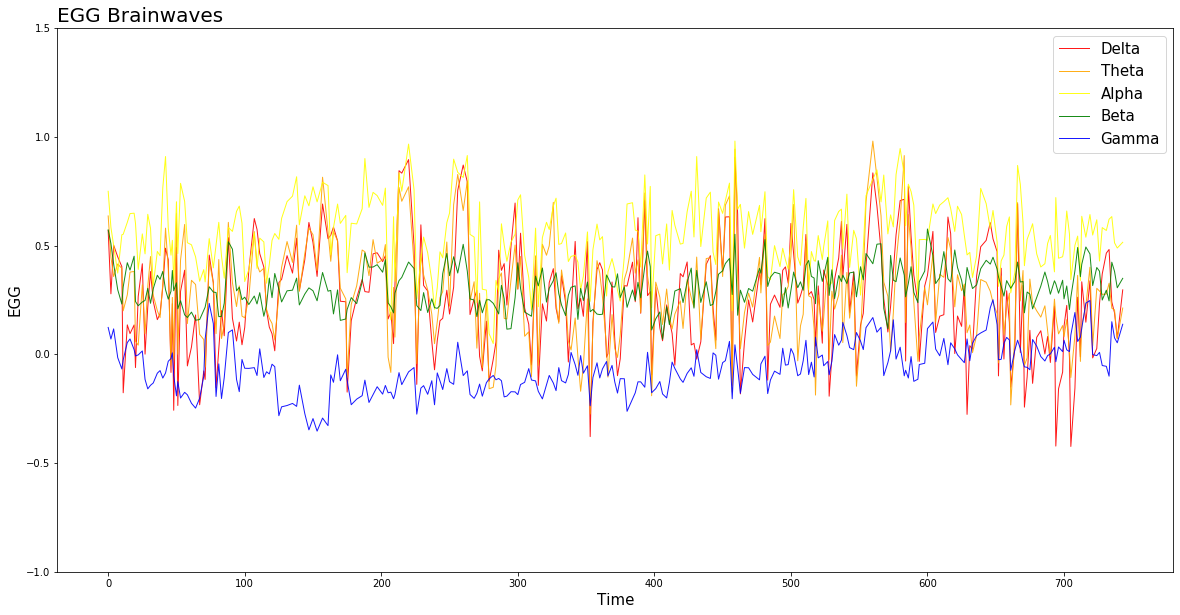

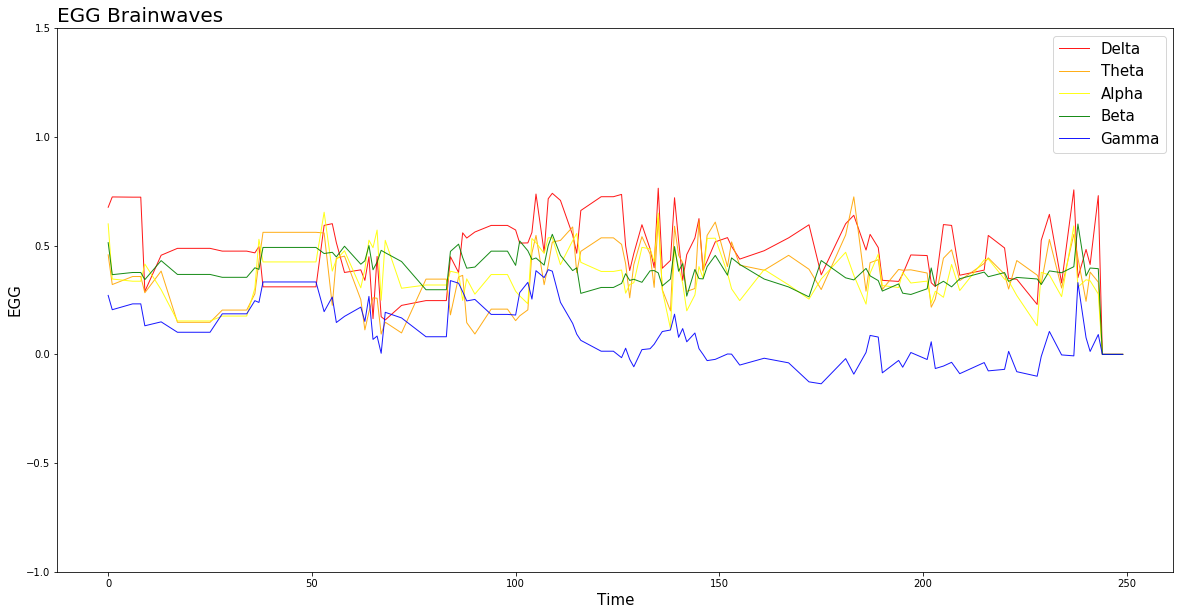

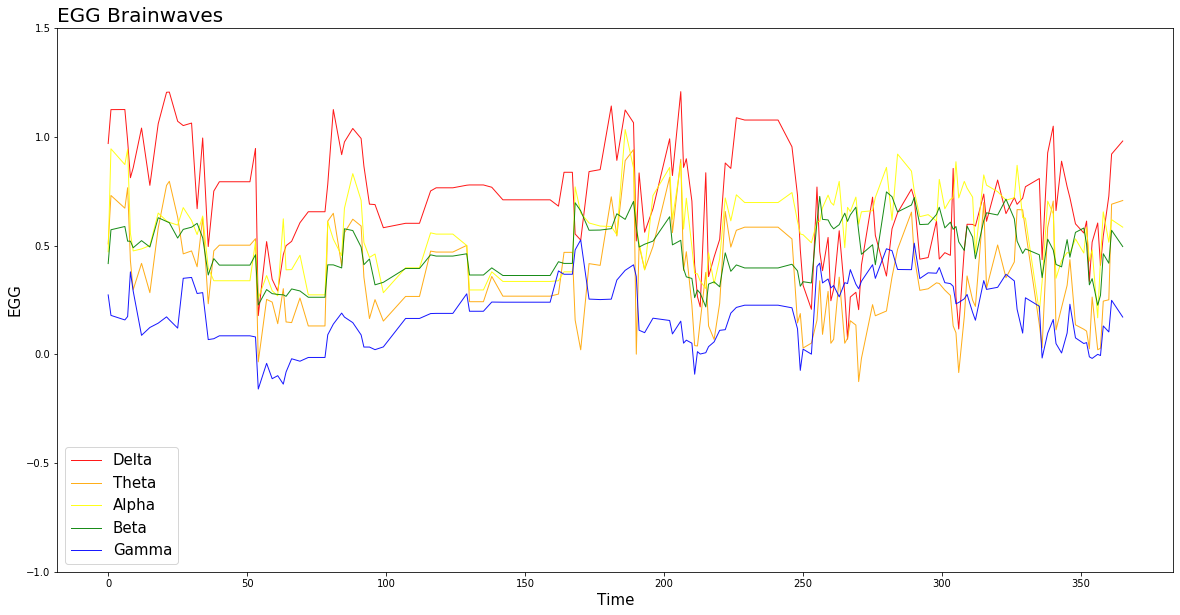

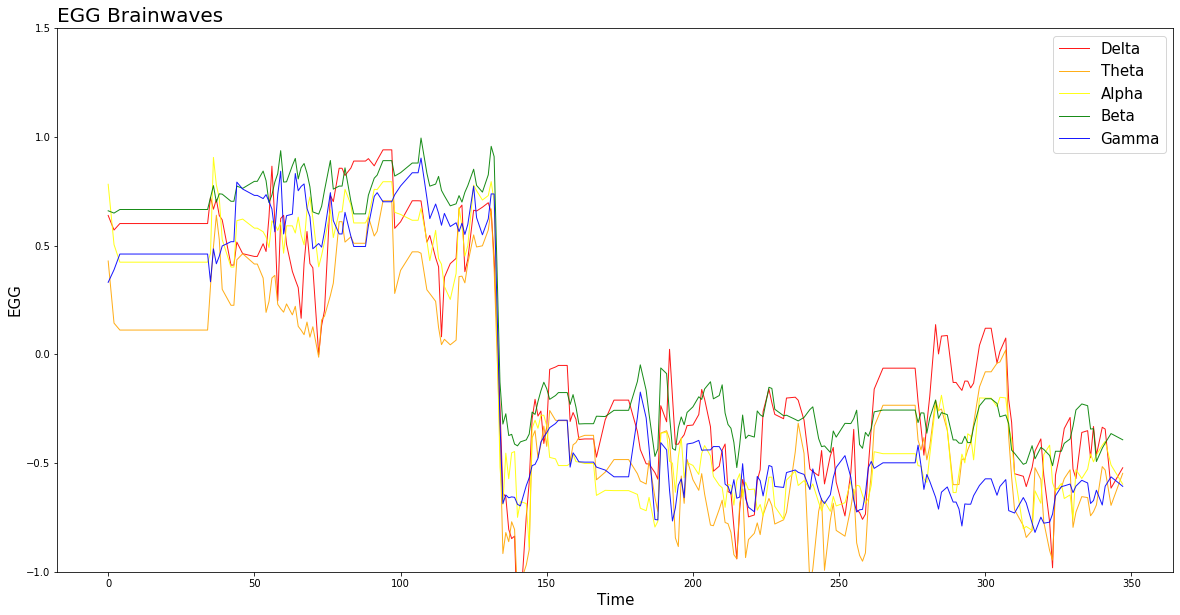

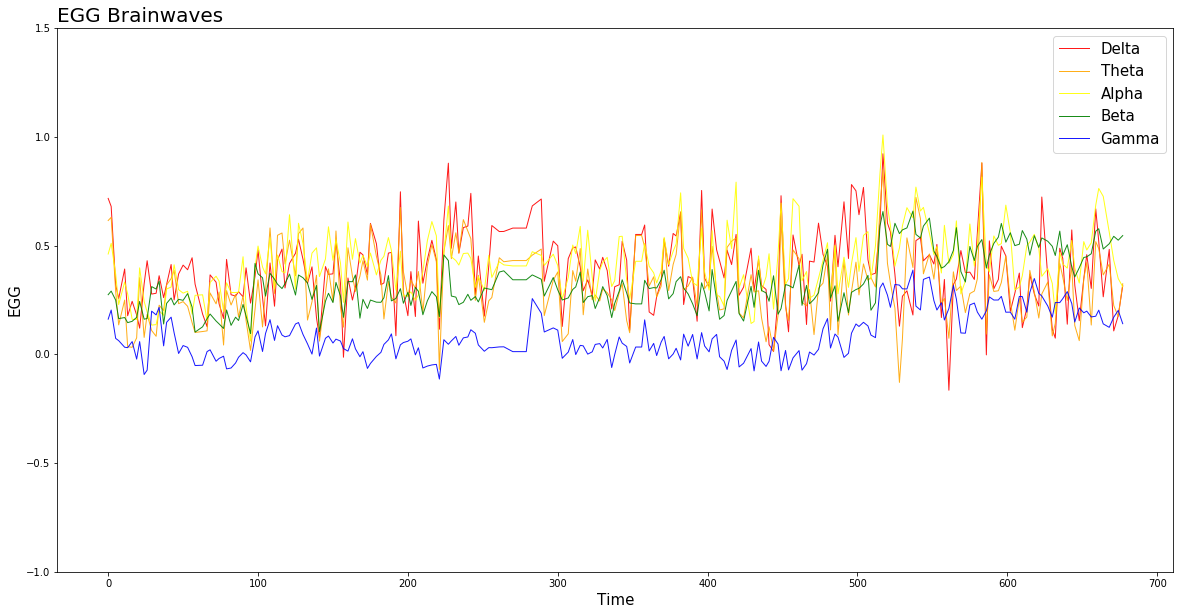

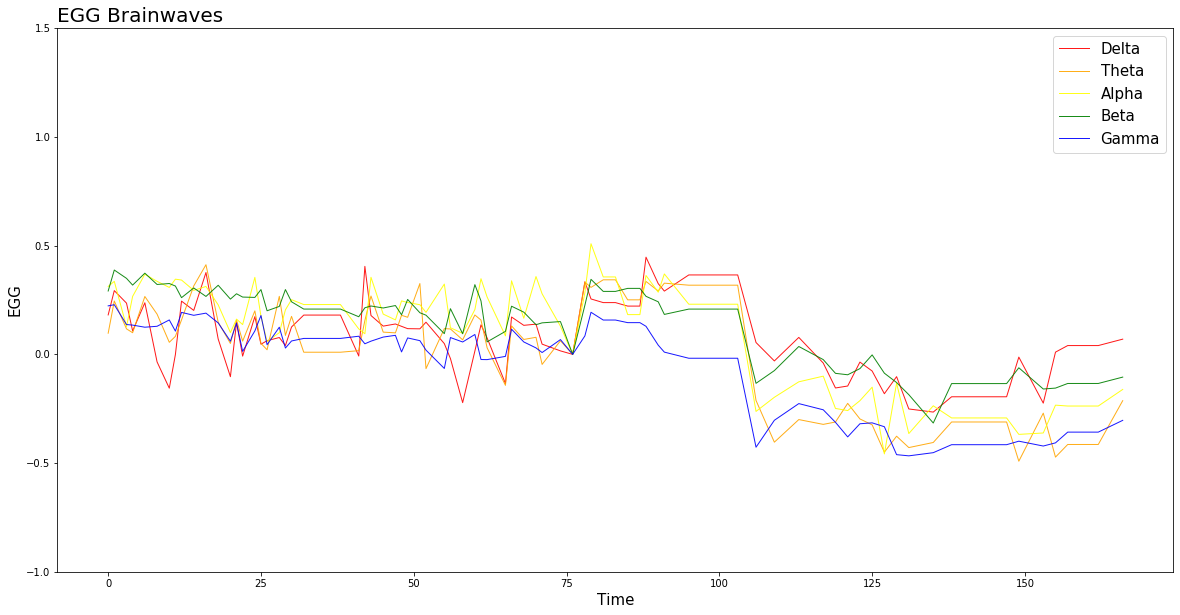

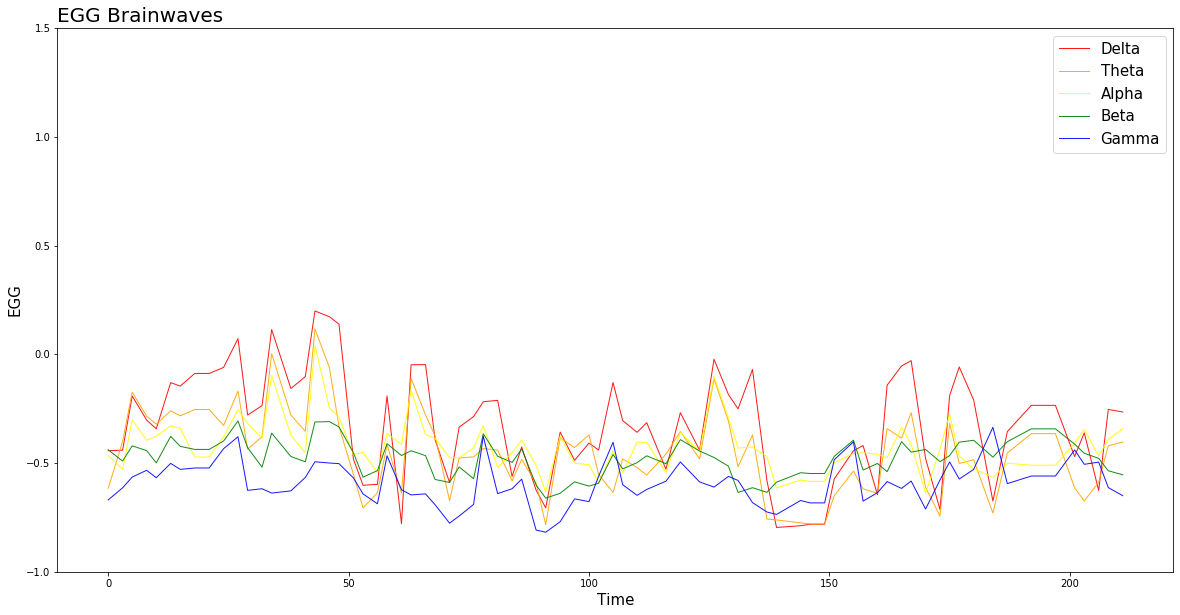

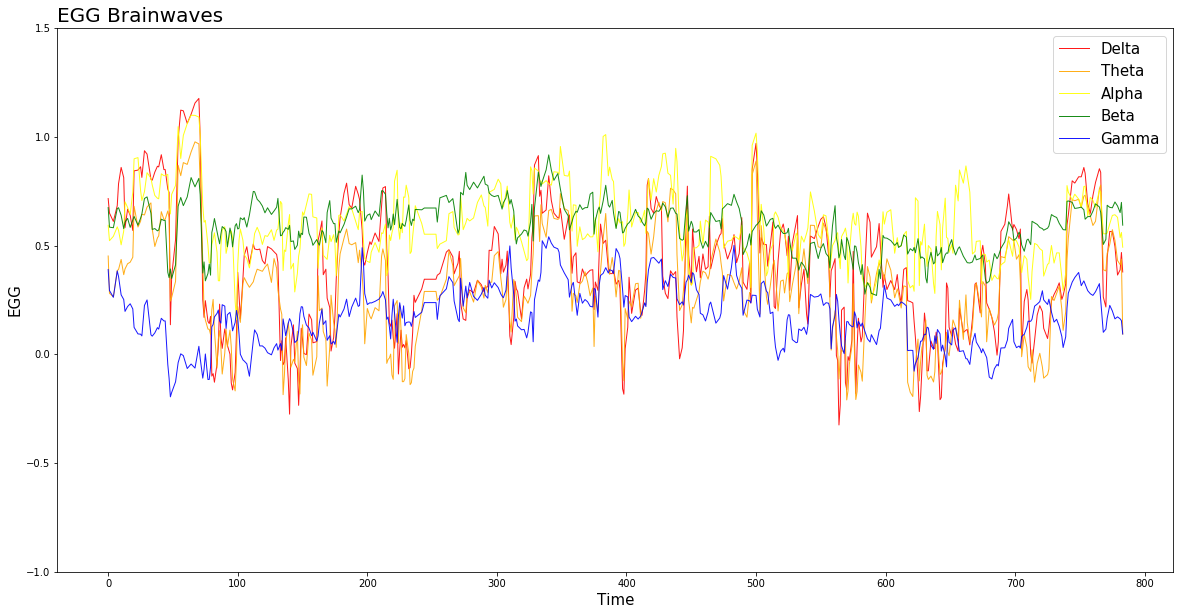

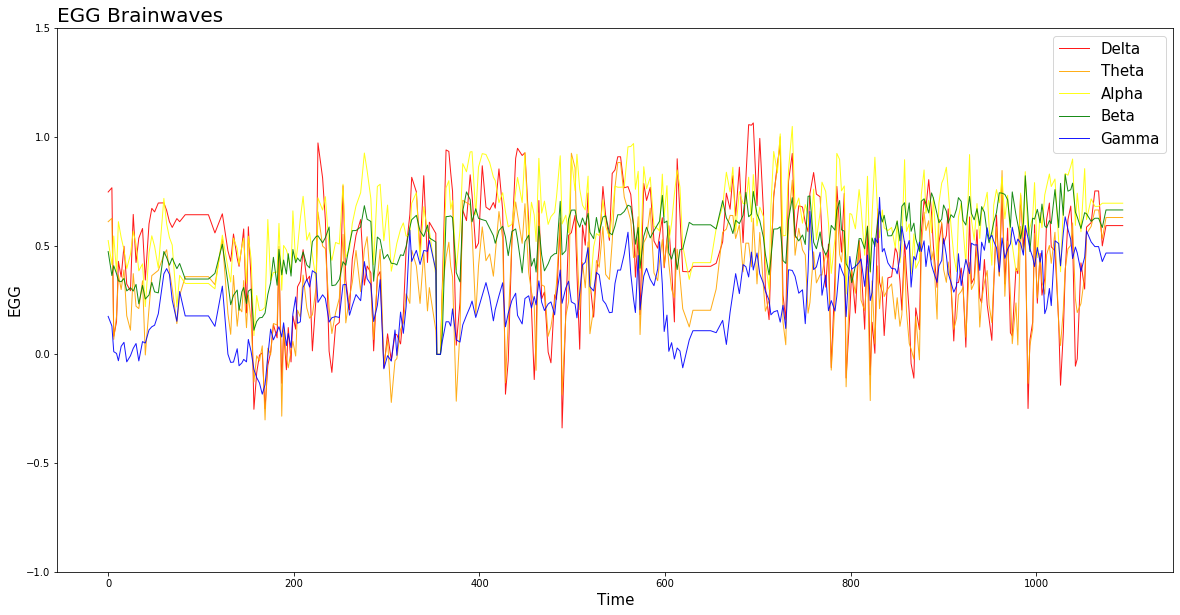

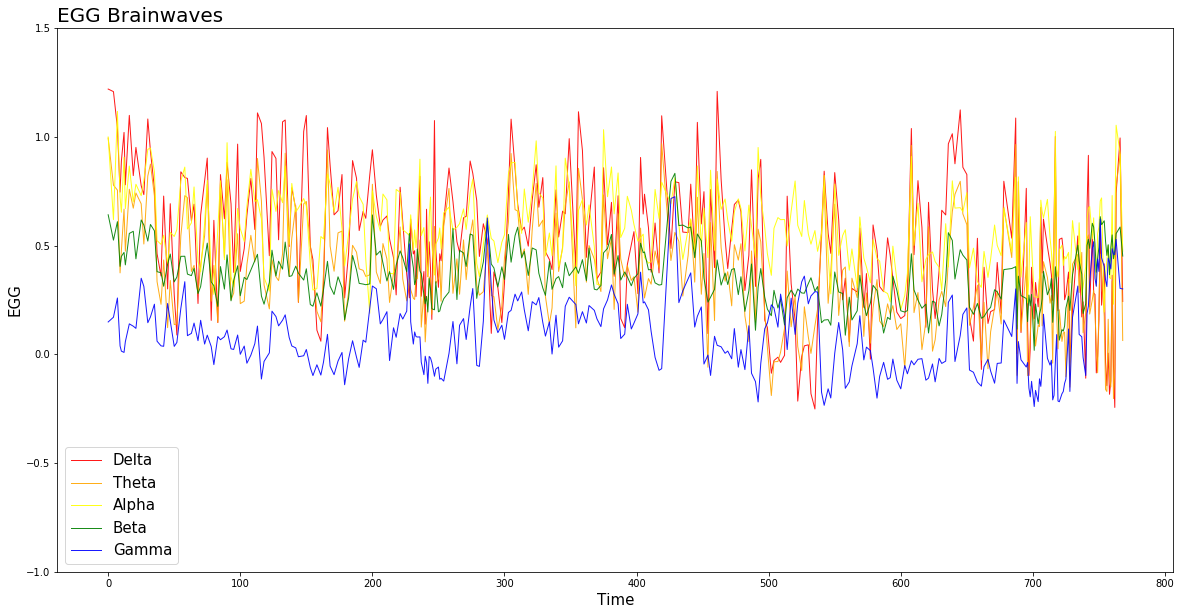

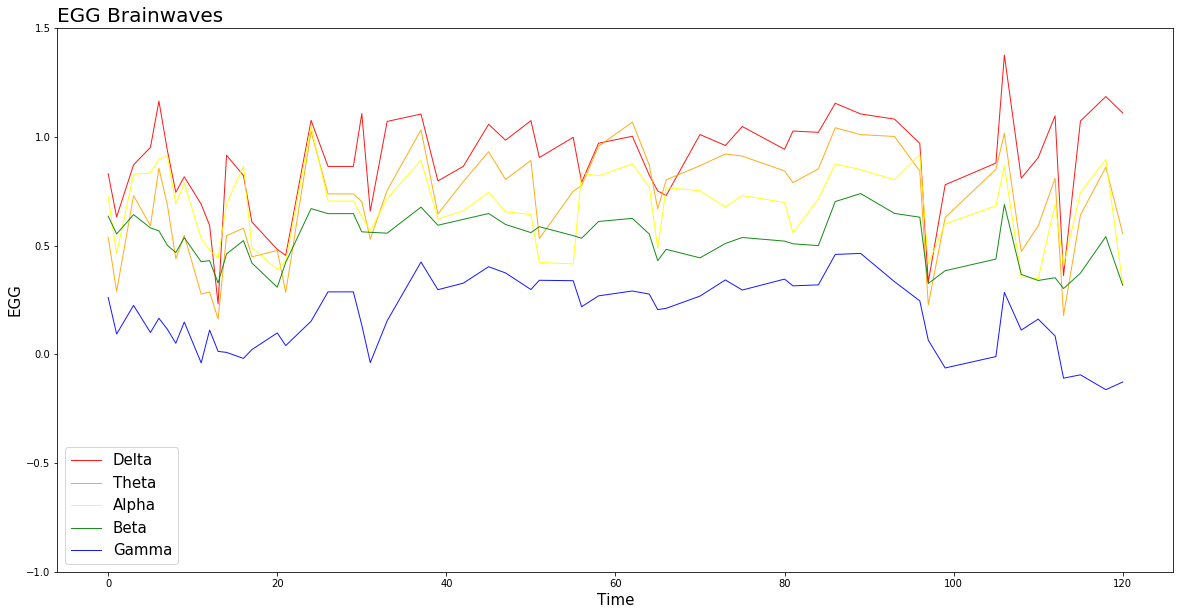

In [464]:
for dataframe in simplified_sessions_N:
    multiline_waves(dataframe)

In [452]:
#from sklearn.preprocessing import StandardScaler
#simplified_sessions_N

#scaled_sessions_N =[]
#for dataframe in simplified_sessions_N:
 #   scaler = StandardScaler()
  #  numpy = scaler.fit_transform(dataframe)  
#  test = pd.DataFrame(numpy, columns=["Delta", "Theta", "Alpha", "Beta", "Gamma", "Activity"])
 #   test = test[(np.abs(test) < 3).all(axis=1)]
  #  scaled_sessions_N.append(test)

In [463]:
#GETTING AGGREGATE AVG OF ALL SESSIONS ON NORMAL STATE -> Improve!

df_concat = pd.concat((simplified_sessions_N[i] for i in range(len(simplified_sessions_N))))
by_row_index = df_concat.groupby(df_concat.index)
df_normal_means = by_row_index.mean().reset_index(drop=True)
df_normal_means

,Delta,Theta,Alpha,Beta,Gamma,Activity
0,0.620354,0.429519,0.523275,0.428739,0.153670,0
1,0.684843,0.373456,0.522625,0.493208,0.200009,0
2,0.510188,0.407256,0.533351,0.483531,0.221063,0
3,0.222115,0.148858,0.142311,0.167168,-0.083848,0
4,0.632879,0.372905,0.461101,0.478394,0.212777,0
...,...,...,...,...,...,...
852,0.592204,0.629364,0.695148,0.664153,0.466014,0
853,0.592204,0.629364,0.695148,0.664153,0.466014,0
854,0.592204,0.629364,0.695148,0.664153,0.466014,0
855,0.592204,0.629364,0.695148,0.664153,0.466014,0


In [415]:
df_concat = pd.concat((simplified_sessions_M[i] for i in range(len(simplified_sessions_M))))
by_row_index = df_concat.groupby(df_concat.index)
df_meditation_means = by_row_index.mean().reset_index(drop=True)
df_meditation_means

,Delta,Theta,Alpha,Beta,Gamma,Activity
0,0.476610,0.240525,0.468202,0.272267,-0.052913,1
1,0.426433,0.309301,0.524959,0.261331,-0.053809,1
2,0.566515,0.351019,0.528184,0.436447,0.053581,1
3,0.357843,0.140092,0.334553,0.220662,-0.076715,1
4,0.480715,0.255604,0.458221,0.249352,-0.077736,1
...,...,...,...,...,...,...
681,-0.089825,-0.233133,-0.020393,-0.211648,-0.449388,1
682,-0.019864,-0.459459,0.028204,-0.174764,-0.348988,1
683,-0.381018,-0.371906,0.022115,-0.165488,-0.420029,1
684,0.023797,-0.395403,-0.029497,-0.200197,-0.369676,1


## DESCRIPTIVE STATISTICS

In [459]:
brainwaves = ["Delta", "Theta", "Alpha","Beta", "Gamma"]
colors = ["Red", "Orange", "Yellow", "Green", "Blue"]
wave_to_color = dict(zip(brainwaves, colors))


def multiline_waves(dataframe):
    
    """The function generates a multi-line plot of all the brainwaves"""
    
    x = dataframe.index #dataframe["TimeStamp"]
    df = dataframe[["Delta", "Theta", "Alpha","Beta", "Gamma"]]

    plt.figure(figsize=(20,10))
    num=0
    for brainwave in brainwaves:
        num+=1
        plt.plot(x, df[brainwave], marker='', color=wave_to_color.get(brainwave), linewidth=1, alpha=0.9, label=brainwave)
    
    plt.legend(fontsize=15)
    plt.title("EGG Brainwaves", loc='left', fontsize=20, fontweight=1, color='black')
    plt.xlabel("Time", fontsize=15)
    plt.ylabel("EGG", fontsize=15)
    plt.ylim([-1,1.5])


def histogram_qq_waves(dataframe):
  
    """The function shows graphically the distribution of each brainwave"""
    
    for brainwave in brainwaves:
        plt.figure(brainwave)
        sns.distplot(dataframe[brainwave], color=wave_to_color.get(brainwave))
        #qqplot(pd.DataFrame(dataframe[brainwave]))
        

def line_wave(dataframe, state):
    
    """The function shows graphically the pattern of each brainwave in the session"""
    
    x = dataframe.index #dataframe["TimeStamp"]
    df = dataframe[["Delta", "Theta", "Alpha","Beta", "Gamma"]]

    for brainwave in brainwaves:
        plt.plot(x, df[brainwave], marker='', color=wave_to_color.get(brainwave), linewidth=1, alpha=0.9, label=brainwave)
        plt.title(f"{brainwave, state}") 
        plt.xlabel("time", fontsize = 10)
        plt.ylabel(f"{brainwave}", fontsize = 10)
        plt.ylim([-1,1.5])
        plt.show()
        plt.savefig("/Users/rebeccaestiarte/Desktop/IronHack/PROJECTS/Project-Week-8-Final-Project/your-project/Export Figures/{state}.png", dpi = 400, quality = 100)
    
    
    #to do: save figure as name
    #plot with same y axis

#### TESTING WITH AGGREGATED DATAFRAME

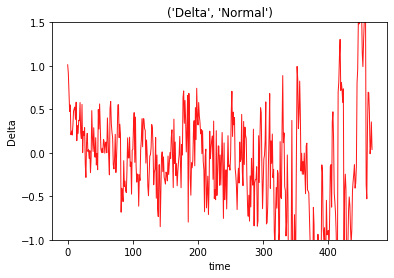

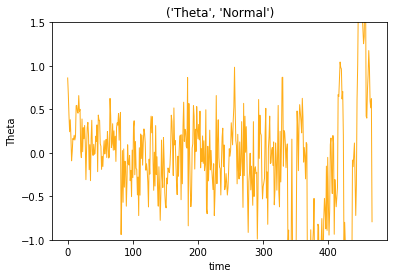

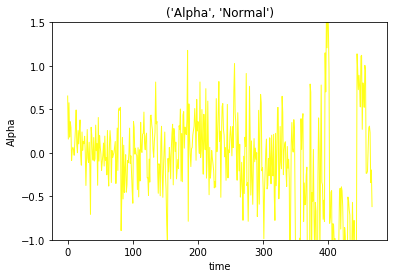

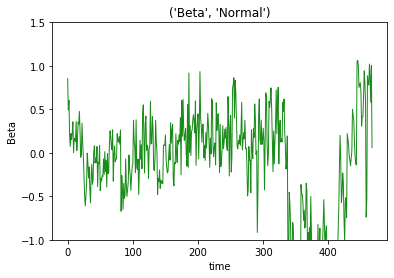

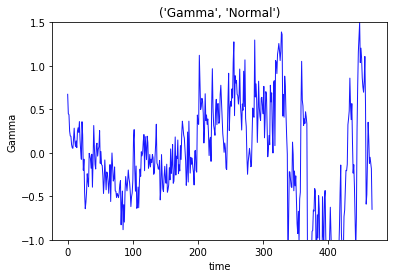

<Figure size 432x288 with 0 Axes>

In [460]:
line_wave(df_normal_means, "Normal")

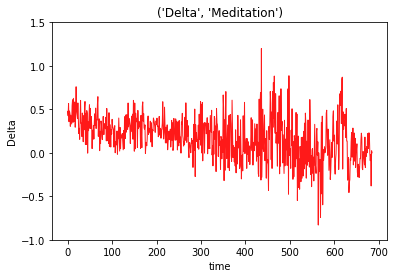

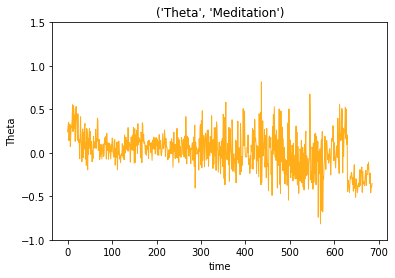

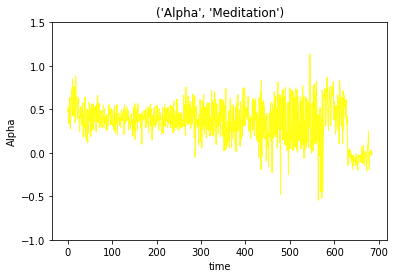

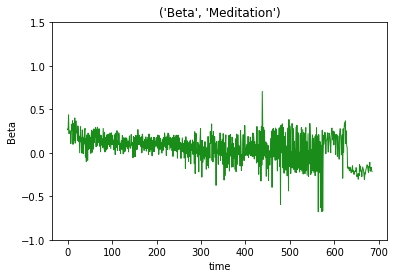

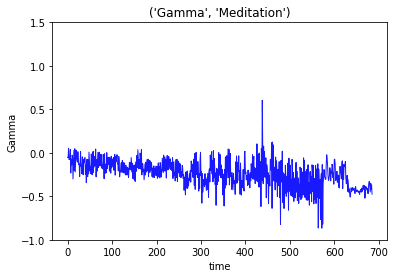

<Figure size 432x288 with 0 Axes>

In [461]:
line_wave(df_meditation_means, "Meditation")

In [462]:
df_normal_means.describe()

,Delta,Theta,Alpha,Beta,Gamma,Activity
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.0
mean,-0.108442,-0.098568,-0.108190,-0.131061,-0.037593,0.0
std,0.606982,0.641496,0.592292,0.655091,0.627541,0.0
min,-2.225674,-2.030772,-2.123497,-2.853750,-2.218026,0.0
25%,-0.409836,-0.388821,-0.375766,-0.351726,-0.380657,0.0
50%,-0.071638,-0.038518,-0.025953,0.011853,-0.036467,0.0
75%,0.247593,0.244999,0.234266,0.262545,0.383736,0.0
max,1.733942,2.016385,1.697469,1.062968,1.498382,0.0


In [420]:
df_meditation_means.describe()

,Delta,Theta,Alpha,Beta,Gamma,Activity
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.0
mean,0.180715,0.022983,0.363600,0.057729,-0.233492,1.0
std,0.255110,0.225429,0.236640,0.176326,0.161355,0.0
min,-0.830226,-0.817138,-0.545140,-0.678489,-0.866242,1.0
25%,0.018705,-0.101584,0.243753,-0.041049,-0.328906,1.0
50%,0.188666,0.037970,0.382678,0.093272,-0.220242,1.0
75%,0.353093,0.158574,0.525075,0.189132,-0.116646,1.0
max,1.199304,0.814902,1.136160,0.706294,0.604823,1.0


In [421]:
df_meditation_means

,Delta,Theta,Alpha,Beta,Gamma,Activity
0,0.476610,0.240525,0.468202,0.272267,-0.052913,1
1,0.426433,0.309301,0.524959,0.261331,-0.053809,1
2,0.566515,0.351019,0.528184,0.436447,0.053581,1
3,0.357843,0.140092,0.334553,0.220662,-0.076715,1
4,0.480715,0.255604,0.458221,0.249352,-0.077736,1
...,...,...,...,...,...,...
681,-0.089825,-0.233133,-0.020393,-0.211648,-0.449388,1
682,-0.019864,-0.459459,0.028204,-0.174764,-0.348988,1
683,-0.381018,-0.371906,0.022115,-0.165488,-0.420029,1
684,0.023797,-0.395403,-0.029497,-0.200197,-0.369676,1


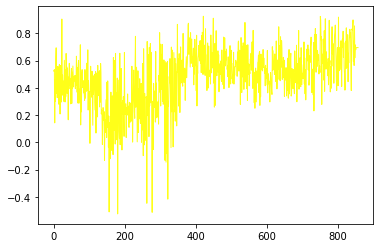

In [456]:
x = df_normal_means.index #dataframe["TimeStamp"]
df = df_normal_means["Alpha"]

plt.plot(x, df, marker='', color= "yellow", linewidth=1, alpha=0.9, label="alpha")

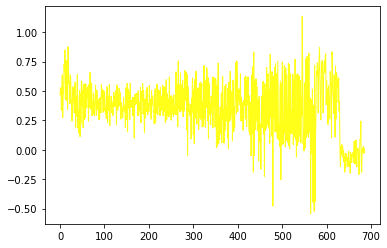

In [423]:
x = df_meditation_means.index #dataframe["TimeStamp"]
df = df_meditation_means["Alpha"]

plt.plot(x, df, marker='', color= "yellow", linewidth=1, alpha=0.9, label="alpha")

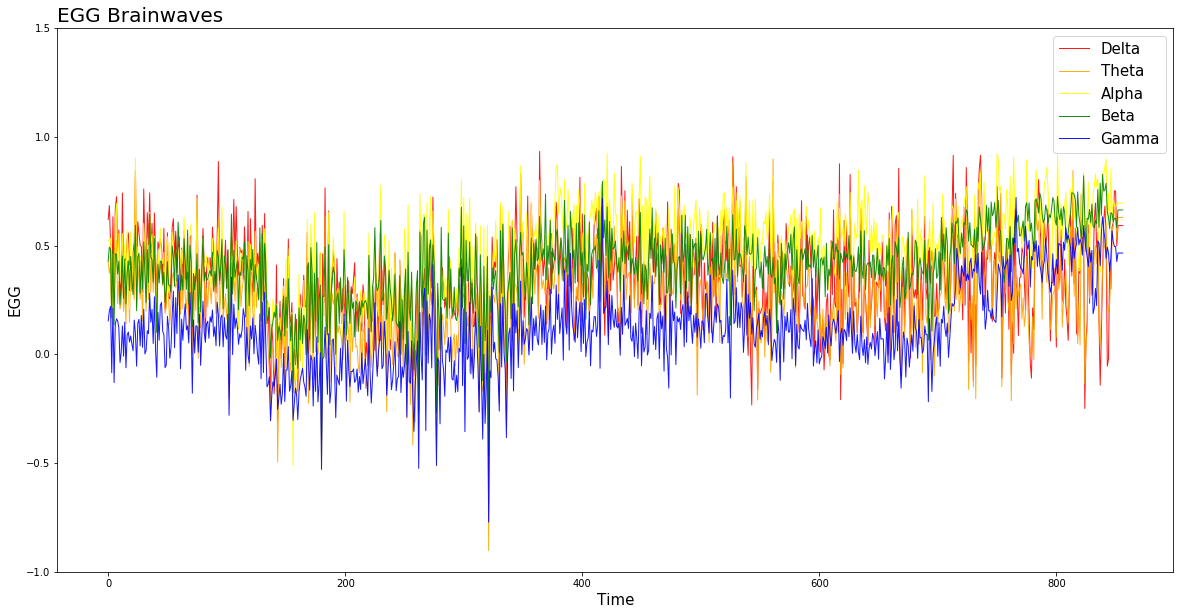

In [457]:
multiline_waves(df_normal_means)

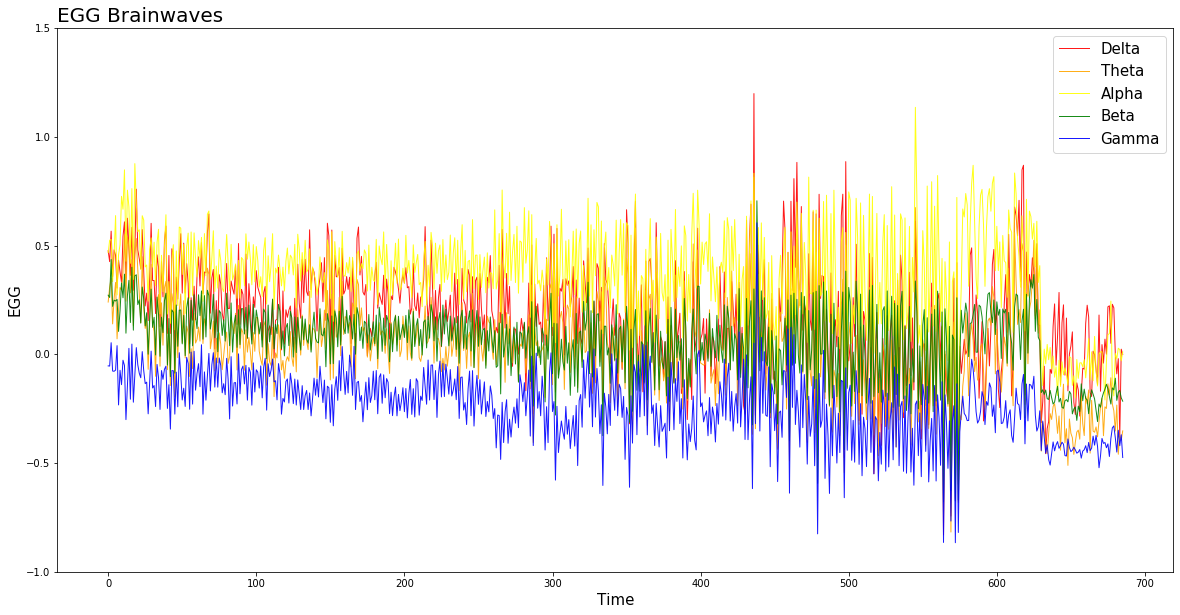

In [369]:
multiline_waves(df_meditation_means)

> We can see that Alpha Waves during meditation sessions clearly predominates over the other waves. At the same, beta waves register lower values. When Alpha predominates most people feel at ease and calm. Alpha appears to bridge the conscious to the subconscious.
Beta brainwaves dominate our normal waking state of consciousness when attention is directed towards cognitive tasks and the outside world. Beta is a ‘fast’ activity, present when we are alert, attentive, engaged in problem solving, judgment, decision making, or focused mental activity. Hi-Beta (Beta3, 22-38Hz) is highly complex thought, integrating new experiences, high anxiety, or excitement. Continual high frequency processing is not a very efficient way to run the brain, as it takes a tremendous amount of energy. 

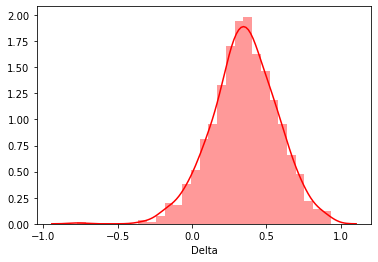

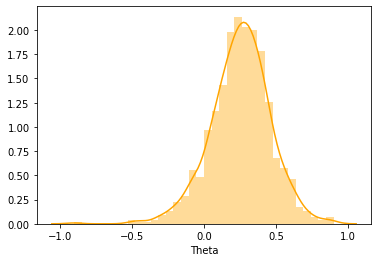

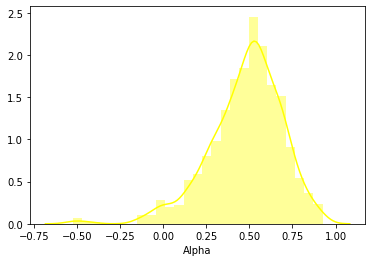

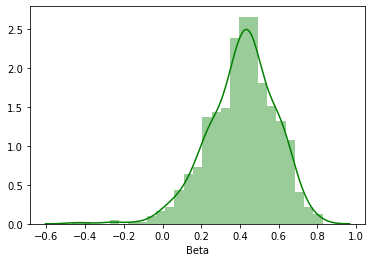

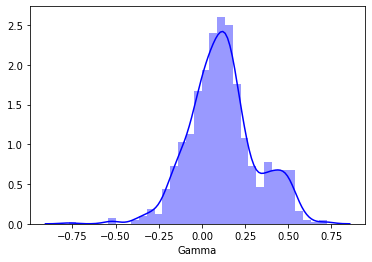

In [371]:
histogram_qq_waves(df_normal_means)

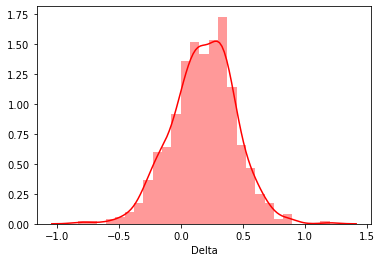

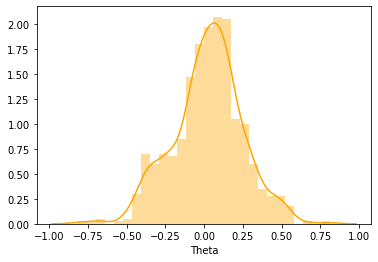

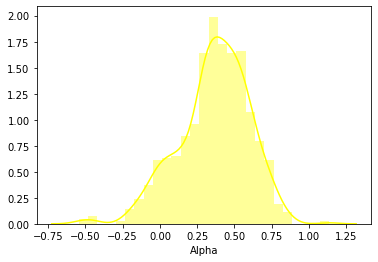

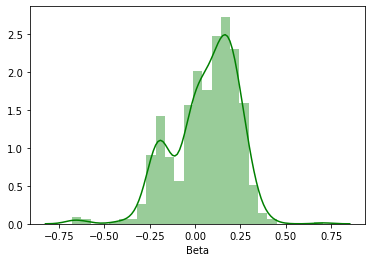

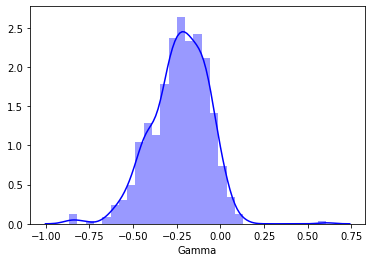

In [372]:
histogram_qq_waves(df_meditation_means)

> The distribution of the Brainwaves follows a Normal Distribution

## HYPOTESIS TESTING 

#### HYPOTESIS A: Alpha waves are (significantly) stronger in meditation vs normal sessions:

Hypotesis A.1: Alpha waves are (significantly) different in meditation vs normal sessions:
h0 : mu1 = mu2
h1 : mu1 != mu2

I will use the t-test to compare the mean of two given samples as the population parameters (mean and standard deviation) are not known. I proved above the normal distribution of the samples. I will use the independent samples t-test as I am comparing the mean for two independent groups.

> Decision Rule: Accept H1 if the calculated p-value < .05.

In [393]:
df_meditation_means["Alpha"]

0      0.468202
1      0.524959
2      0.528184
3      0.334553
4      0.458221
         ...   
681   -0.020393
682    0.028204
683    0.022115
684   -0.029497
685    0.010698
Name: Alpha, Length: 686, dtype: float64

In [394]:
df_normal_means["Alpha"]

0      0.523275
1      0.522625
2      0.533351
3      0.142311
4      0.461101
         ...   
852    0.695148
853    0.695148
854    0.695148
855    0.695148
856    0.695148
Name: Alpha, Length: 857, dtype: float64

In [373]:
M_Alpha = pd.DataFrame(df_meditation_means["Alpha"])
N_Alpha = pd.DataFrame(df_normal_means["Alpha"])
N_Alpha = N_Alpha.head(686)

result = pd.concat([M_Alpha, N_Alpha], axis=1, sort=False)
columns = ['Alpha_M', 'Alpha_N']
result.columns = columns

X = sm.add_constant(result[['Alpha_M']])
model = sm.OLS(result.Alpha_N,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Alpha_N   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9913
Date:                Mon, 09 Mar 2020   Prob (F-statistic):              0.320
Time:                        17:24:21   Log-Likelihood:                 87.577
No. Observations:                 686   AIC:                            -171.2
Df Residuals:                     684   BIC:                            -162.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4566      0.015     30.568      0.0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Hypotesis A.2: Alpha waves are (significantly) stronger in meditation vs normal sessions:

Alpha Waves are (significantly) stronger in meditation sessions
h0 : mu1 > mu2 

where:
mu1 : mean of alpha waves during Meditation Session
mu2 : mean of alpha waves during Normal Session

In [374]:
print(result.mean())
if result['Alpha_M'].mean() > result['Alpha_N'].mean():
    print("The Alpha Waves during meditation are significantly higher than at normal state")

Alpha_M    0.363600
Alpha_N    0.444109
dtype: float64


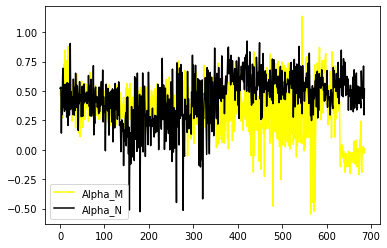

In [375]:
#Graphical representation Alpha Waves Means by timestamp Meditation vs Normal
plt.plot(result['Alpha_M'], label='Alpha_M', c=wave_to_color.get("Alpha"))
plt.plot(result['Alpha_N'], label='Alpha_N', c="black")
plt.legend()
plt.show()

> Interpretation: As the P value of the model is very low, we can reject the null hypotesis of identical average alpha waves between the sessions of Meditation against the control (Normal State). Therefore, there is significant statistical difference between the waves. Specifically, Alpha waves during meditation are stronger that at normal state.

In [392]:
#Other Solution

mu1 = df_meditation_means["Alpha"].mean()
std1 = df_meditation_means["Alpha"].std()
n1 = df_meditation_means["Alpha"].shape[0]

mu2 = df_normal_means["Alpha"].mean()
std2 = df_normal_means["Alpha"].std()
n2 = df_normal_means["Alpha"].shape[0]

from scipy import stats

t_score, p_value = stats.ttest_ind_from_stats(mu1,std1,n1, mu2,std2,n2, equal_var=False) #welch test-> not assuming equal variances in population
print(t_score, p_value)

decision_parameter = 0.05
if p_value < decision_parameter:
    print("accept H1")

-9.883994771229451 2.5959956936012663e-22
accept H1


#### HYPOTESIS B: There are more peaks of Gamma Waves in meditation vs normal session

In [377]:
M_Gamma = pd.DataFrame(df_normal_means["Gamma"]).head(447)
N_Gamma = pd.DataFrame(df_meditation_means["Gamma"])

In [378]:
result = pd.concat([M_Gamma, N_Gamma], axis=1, sort=False)
columns = ['Gamma_M', 'Gamma_N']
result.columns = columns

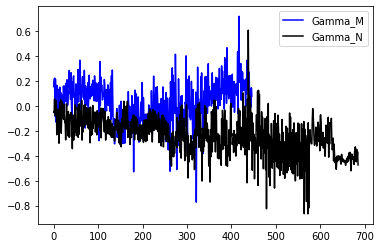

In [379]:
plt.plot(result['Gamma_M'], label='Gamma_M', c=wave_to_color.get("Gamma"))
plt.plot(result['Gamma_N'], label='Gamma_N', c="black")
plt.legend()
plt.show()

In [380]:
# ASK ALI

## MACHINE LEARNING MODEL

In [381]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve


In [382]:
ML_data = pd.concat([df_meditation_means, df_normal_means], axis=0)
ML_data 

,Delta,Theta,Alpha,Beta,Gamma,Activity
0,0.476610,0.240525,0.468202,0.272267,-0.052913,1
1,0.426433,0.309301,0.524959,0.261331,-0.053809,1
2,0.566515,0.351019,0.528184,0.436447,0.053581,1
3,0.357843,0.140092,0.334553,0.220662,-0.076715,1
4,0.480715,0.255604,0.458221,0.249352,-0.077736,1
...,...,...,...,...,...,...
852,0.592204,0.629364,0.695148,0.664153,0.466014,0
853,0.592204,0.629364,0.695148,0.664153,0.466014,0
854,0.592204,0.629364,0.695148,0.664153,0.466014,0
855,0.592204,0.629364,0.695148,0.664153,0.466014,0


## Splitting the dataframe into features and target with 80-20 split
inputs and output and then to 80% 20% split to train and test using different models.

In [383]:
X = ML_data[["Delta", "Theta", "Alpha", "Beta", "Gamma"]]
y = ML_data["Activity"]

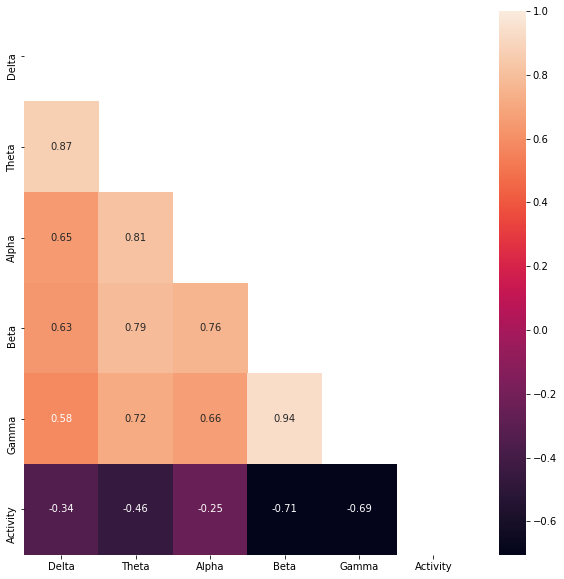

In [384]:
corr = ML_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr,mask=mask, annot=True) #?????

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , shuffle = True)

## Random Forest Regressor (RFR)

test: max_depth 2
0.6848269926370065
train: max_depth 2
0.6546445341366138
absolute difference: 0.0009109808011279273
-------------------------------------
test: max_depth 3
0.8085351458982468
train: max_depth 3
0.8249336507011308
absolute difference: 0.0002689109597702084
-------------------------------------
test: max_depth 4
0.8374732564764321
train: max_depth 4
0.8831265338884808
absolute difference: 0.002084221738461478
-------------------------------------
test: max_depth 5
0.8632557129482675
train: max_depth 5
0.9337136745088147
absolute difference: 0.004964324347267544
-------------------------------------
test: max_depth 6
0.8702768728393248
train: max_depth 6
0.9619677922104294
absolute difference: 0.00840722469511841
-------------------------------------
test: max_depth 7
0.8741450426106625
train: max_depth 7
0.9752972036093707
absolute difference: 0.010231759674708577
-------------------------------------
test: max_depth 8
0.8758829924661045
train: max_depth 8
0.98086013358

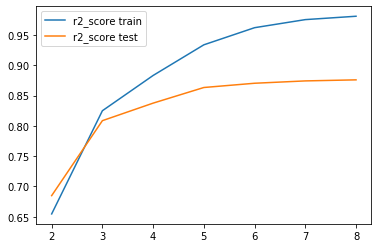

In [386]:
#Testing effect of different depth parameters on model 

r2_scores_train = []
r2_scores_test = []
max_depth_par = [2,3,4,5,6,7,8]
for parameter in max_depth_par:
    rfr = RandomForestRegressor(max_depth=parameter)
    rfr.fit(X_train, y_train)
    
    y_predict_test = rfr.predict(X_test)
    y_predict_train = rfr.predict(X_train)
    
    scores_test =  r2_score(y_test, y_predict_test)
    scores_train =  r2_score(y_train, y_predict_train)
    
    print("test: max_depth", parameter)
    print (scores_test)
    
    print("train: max_depth", parameter)
    print (scores_train)
    
    var = (scores_train-scores_test)**2
    print("absolute difference:", var)
    
    print("-------------------------------------")

    r2_scores_test.append(scores_test)
    r2_scores_train.append(scores_train)
        
plt.plot(max_depth_par, r2_scores_train, label='r2_score train')
plt.plot(max_depth_par, r2_scores_test, label='r2_score test')
plt.legend()
plt.show()

> Best Depth Parameters apperars to be 3 or 4

In [387]:
rfr = RandomForestClassifier(max_depth=4).fit(X_train, y_train)

rfr_y_predict = rfr.predict(X_test)

In [388]:
print(confusion_matrix(y_test, rfr_y_predict))
print(f'Accuracy score = {accuracy_score(y_test, rfr_y_predict)}')
print(f'Precision score = {precision_score(y_test, rfr_y_predict)}')
print(f'Recall score = {recall_score(y_test, rfr_y_predict)}')
print(f'f1 score = {f1_score(y_test, rfr_y_predict)}')
print(f'ROC AUC score = {roc_auc_score(y_test, rfr_y_predict)}')

[[164   5]
 [  8 132]]
Accuracy score = 0.9579288025889967
Precision score = 0.9635036496350365
Recall score = 0.9428571428571428
f1 score = 0.9530685920577618
ROC AUC score = 0.9566356720202873


## Logistic Regressor (LR)

In [389]:
lr = LogisticRegression().fit(X_train, y_train)
lr_y_predict = lr.predict(X_test)

In [390]:
print(confusion_matrix(y_test, lr_y_predict))
print(f'Accuracy score = {accuracy_score(y_test, lr_y_predict)}')
print(f'Precision score = {precision_score(y_test, lr_y_predict)}')
print(f'Recall score = {recall_score(y_test, lr_y_predict)}')
print(f'f1 score = {f1_score(y_test, lr_y_predict)}')
print(f'ROC AUC score = {roc_auc_score(y_test, lr_y_predict)}')

[[164   5]
 [  9 131]]
Accuracy score = 0.9546925566343042
Precision score = 0.9632352941176471
Recall score = 0.9357142857142857
f1 score = 0.9492753623188407
ROC AUC score = 0.9530642434488589


## K nearest neighbor (KNN)

test: n_neighbors 1
0.7779797125950972
train: n_neighbors 1
1.0
absolute difference: 0.04929300801935562
-------------------------------------
test: n_neighbors 2
0.7779797125950972
train: n_neighbors 2
0.9047352840957492
absolute difference: 0.016066974906456897
-------------------------------------
test: n_neighbors 3
0.8563398140321218
train: n_neighbors 3
0.9047352840957492
absolute difference: 0.002342121522679459
-------------------------------------
test: n_neighbors 4
0.8040997464074388
train: n_neighbors 4
0.8784553624669904
absolute difference: 0.005528757639595456
-------------------------------------
test: n_neighbors 5
0.843279797125951
train: n_neighbors 5
0.8948803134849647
absolute difference: 0.002662613288516834
-------------------------------------
test: n_neighbors 6
0.8302197802197803
train: n_neighbors 6
0.8718853820598007
absolute difference: 0.0017360223766911145
-------------------------------------
test: n_neighbors 7
0.8171597633136095
train: n_neighbors 7
0.

ValueError: x and y must have same first dimension, but have shapes (7,) and (14,)

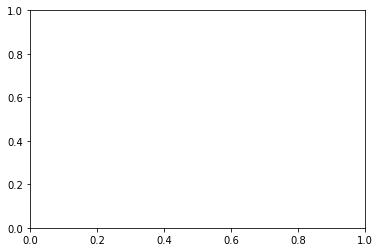

In [391]:
#Testing effect of different neighbor parameters on model 

neighbors_par = [1,2,3,4,5,6,7]

for neighbor in neighbors_par:
    knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train, y_train)
    
    knn_y_predict_test = knn.predict(X_test)
    knn_y_predict_train = knn.predict(X_train)
    
    scores_test =  r2_score(y_test, knn_y_predict_test)
    scores_train =  r2_score(y_train, knn_y_predict_train)
    
    print("test: n_neighbors", neighbor)
    print (scores_test)
    
    print("train: n_neighbors", neighbor)
    print (scores_train)
    
    var = (scores_train-scores_test)**2
    print("absolute difference:", var)
    
    print("-------------------------------------")

    r2_scores_test.append(scores_test)
    r2_scores_train.append(scores_train)
        
plt.plot(neighbors_par, r2_scores_train, label='r2_score train')
plt.plot(neighbors_par, r2_scores_test, label='r2_score test')
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_y_predict = knn.predict(X_test)

In [223]:
print(confusion_matrix(y_test, knn_y_predict))
print(f'Accuracy score = {accuracy_score(y_test, knn_y_predict)}')
print(f'Precision score = {precision_score(y_test, knn_y_predict)}')
print(f'Recall score = {recall_score(y_test, knn_y_predict)}')
print(f'f1 score = {f1_score(y_test, knn_y_predict)}')
print(f'ROC AUC score = {roc_auc_score(y_test, knn_y_predict)}')

[[ 74   9]
 [  6 117]]
Accuracy score = 0.9271844660194175
Precision score = 0.9285714285714286
Recall score = 0.9512195121951219
f1 score = 0.9397590361445782
ROC AUC score = 0.9213928886276814
